Student's Name: Pham Quoc Huy

## Import important libraries

In [ ]:
!pip install scikit-learn
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline


In [ ]:
data = pd.read_csv('train.csv', delimiter=';',index_col = 'id')

In [ ]:
data.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1
id,,,,,,,,,,,,,,,,,,,,,
1,F,16,U,GT3,T,4,4,services,services,reputation,...,yes,no,3,2,3,1,2,2,6,13
2,M,15,U,GT3,T,2,2,other,other,home,...,yes,no,4,2,2,1,2,5,2,12
3,F,16,U,GT3,T,4,3,teacher,health,home,...,yes,no,3,4,4,2,4,4,2,10
4,F,17,U,GT3,A,4,4,other,teacher,home,...,no,no,4,1,4,1,1,1,6,6
5,M,15,U,GT3,T,3,4,other,other,reputation,...,yes,no,3,4,3,1,2,4,6,14


In [ ]:
data.tail()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1
id,,,,,,,,,,,,,,,,,,,,,
305,M,18,U,GT3,T,4,4,teacher,services,home,...,yes,no,3,2,4,1,4,3,22,9
306,M,16,U,LE3,T,2,2,services,services,reputation,...,yes,no,2,3,3,2,2,2,8,9
307,F,16,U,GT3,T,3,2,other,other,reputation,...,yes,no,1,2,2,1,2,1,14,12
308,F,17,U,LE3,T,2,2,services,other,course,...,yes,yes,4,4,4,2,3,5,6,12
309,M,17,U,GT3,T,3,2,services,services,course,...,yes,no,5,5,5,2,4,5,16,6


In [ ]:
data['G1'].describe()

count    309.000000
mean      10.864078
std        3.252517
min        3.000000
25%        8.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G1, dtype: float64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309 entries, 1 to 309
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         309 non-null    object
 1   age         309 non-null    int64 
 2   address     309 non-null    object
 3   famsize     309 non-null    object
 4   Pstatus     309 non-null    object
 5   Medu        309 non-null    int64 
 6   Fedu        309 non-null    int64 
 7   Mjob        309 non-null    object
 8   Fjob        309 non-null    object
 9   reason      309 non-null    object
 10  guardian    309 non-null    object
 11  traveltime  309 non-null    int64 
 12  studytime   309 non-null    int64 
 13  failures    309 non-null    int64 
 14  schoolsup   309 non-null    object
 15  famsup      309 non-null    object
 16  paid        309 non-null    object
 17  activities  309 non-null    object
 18  nursery     309 non-null    object
 19  higher      309 non-null    object
 20  internet  

In [ ]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.00000,309.000000
mean,16.553398,2.786408,2.530744,1.365696,2.064725,0.333333,3.957929,3.229773,3.087379,1.440129,2.236246,3.585761,6.12945,10.864078
std,1.222581,1.074955,1.088544,0.643843,0.846508,0.748736,0.872474,0.991336,1.117512,0.871896,1.286486,1.380497,8.54568,3.252517
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,3.000000
25%,16.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.00000,8.000000
50%,16.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.00000,11.000000
75%,17.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.00000,13.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.00000,19.000000


## Data Preprocessing

In [ ]:
#Take all numeric features

df = pd.DataFrame(data)
numeric_features_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_features = df[numeric_features_columns]

#Take all binary features

nominal_n_binary_features_columns = df.select_dtypes(include=['object']).columns
nominal_feature_columns = ['Mjob','Fjob','reason','guardian']
binary_features = df[nominal_n_binary_features_columns].drop(nominal_feature_columns ,axis =1)

#Take all nominal features

nominal_features = df[nominal_feature_columns]

In [ ]:
#Process the binary features

binary_features['sex']= binary_features['sex'].replace({'F': 0, 'M': 1})
binary_features['address']= binary_features['address'].replace({'U': 0, 'R': 1})
binary_features['famsize']= binary_features['famsize'].replace({'LE3': 0, 'GT3': 1})
binary_features['Pstatus']= binary_features['Pstatus'].replace({'T': 0, 'A': 1})
d = {'yes':1, 'no':0}
for column in ['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']:
       binary_features[column]= binary_features[column].replace({'no': 0, 'yes': 1})

#Process the nomial features

for column in nominal_feature_columns:
    nominal_features = pd.get_dummies(nominal_features, columns=[column], drop_first=True)


In [ ]:
#processed Data

processed_data = pd.merge(binary_features,nominal_features, on='id')
processed_data = pd.merge(processed_data,numeric_features, on='id')

In [ ]:
processed_data.head()

,sex,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,...,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,1,1,1,1,1,...,3,0,3,2,3,1,2,2,6,13
2,1,0,1,0,0,1,1,0,1,1,...,1,0,4,2,2,1,2,5,2,12
3,0,0,1,0,1,1,1,1,1,1,...,3,0,3,4,4,2,4,4,2,10
4,0,0,1,1,1,1,0,0,1,1,...,2,0,4,1,4,1,1,1,6,6
5,1,0,1,0,0,0,0,0,1,1,...,1,0,3,4,3,1,2,4,6,14


In [ ]:
processed_data.tail()

,sex,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,...,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1
id,,,,,,,,,,,,,,,,,,,,,
305,1,0,1,0,0,0,1,1,1,1,...,1,0,3,2,4,1,4,3,22,9
306,1,0,0,0,0,1,0,1,1,1,...,1,2,2,3,3,2,2,2,8,9
307,0,0,1,0,0,1,1,0,1,1,...,2,0,1,2,2,1,2,1,14,12
308,0,0,0,0,1,1,1,0,1,1,...,2,0,4,4,4,2,3,5,6,12
309,1,0,1,0,0,1,0,1,1,1,...,1,3,5,5,5,2,4,5,16,6


## Explore the Data to replace unneccessary features

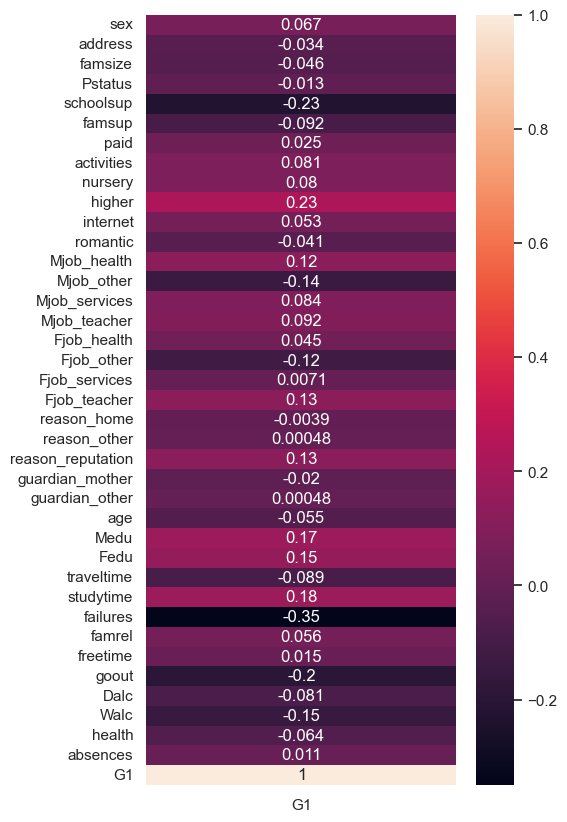

In [ ]:
# Calculate the correlation matrix for all columns
correlation_matrix = processed_data.corr()

# Extract the correlation values for the 'G1' column
correlation_with_G1 = correlation_matrix['G1']

# Create a heatmap of the correlation values
plt.figure(figsize=(5, 10))
sns.heatmap(correlation_with_G1.to_frame(), annot=True, cbar=True)
plt.show()

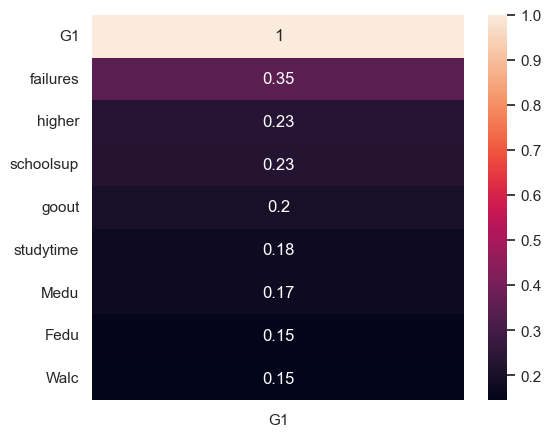

In [ ]:
# Find correlations with the Grade
most_correlated = processed_data.corr().abs()['G1'].sort_values(ascending=False)
# Take the top 8 most correlation features with Grade
most_correlated = most_correlated[:9]
plt.figure(figsize=(6, 5))
sns.heatmap(most_correlated.to_frame(), annot=True, cbar=True)
plt.show()

In [ ]:
selected_data = processed_data.loc[:, most_correlated.index]
selected_data.head()

,G1,failures,higher,schoolsup,goout,studytime,Medu,Fedu,Walc
id,,,,,,,,,
1,13,0,1,0,3,3,4,4,2
2,12,0,1,0,2,1,2,2,2
3,10,0,1,1,4,3,4,3,4
4,6,0,1,1,4,2,4,4,1
5,14,0,1,0,3,1,3,4,2


C:\Users\cvgam\AppData\Local\Temp\ipykernel_6876\2926413135.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  b = sns.stripplot(x=selected_data['failures'],y=selected_data['G1'],palette='autumn')


Text(0.5, 1.0, 'Previous Failures vs Final Grade(G1)')

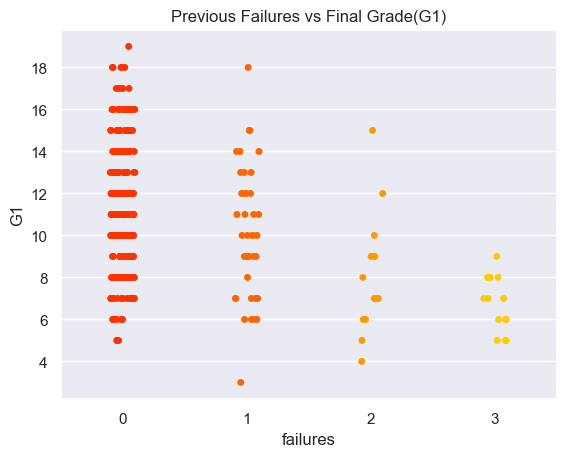

In [ ]:
b = sns.stripplot(x=selected_data['failures'],y=selected_data['G1'],palette='autumn')
b.axes.set_title('Previous Failures vs Final Grade(G1)')

Student with less previous failures usually score higher

C:\Users\cvgam\AppData\Local\Temp\ipykernel_6876\136068054.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  b = sns.swarmplot(x=fa_edu,y=selected_data['G1'],palette='winter')
C:\Users\cvgam\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Family Education vs Final Grade(G1)')

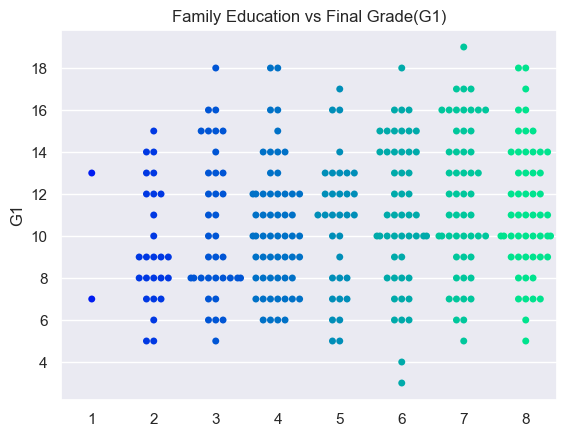

In [ ]:
fa_edu = selected_data['Fedu'] + selected_data['Medu']
b = sns.swarmplot(x=fa_edu,y=selected_data['G1'],palette='winter')
b.axes.set_title('Family Education vs Final Grade(G1)')



```
# This is formatted as code
```

Educated families result in higher grades

Text(0.5, 1.0, 'Higher Education vs Final Grade(G1)')

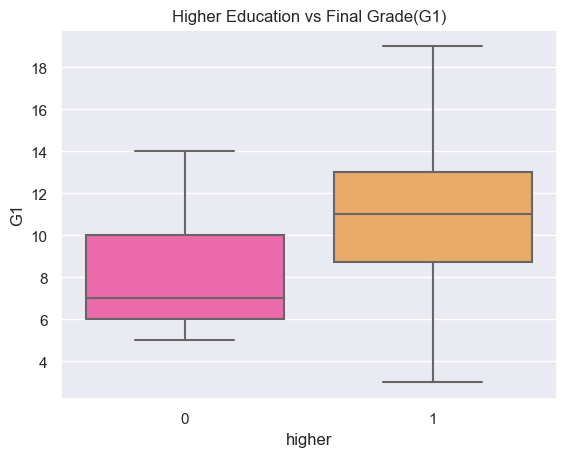

In [ ]:
b = sns.boxplot(x=selected_data['higher'],y=selected_data['G1'],palette='spring')
b.axes.set_title('Higher Education vs Final Grade(G1)')

Students who wish to go for higher studies score more

Text(0.5, 1.0, 'Go Out vs Final Grade(G1)')

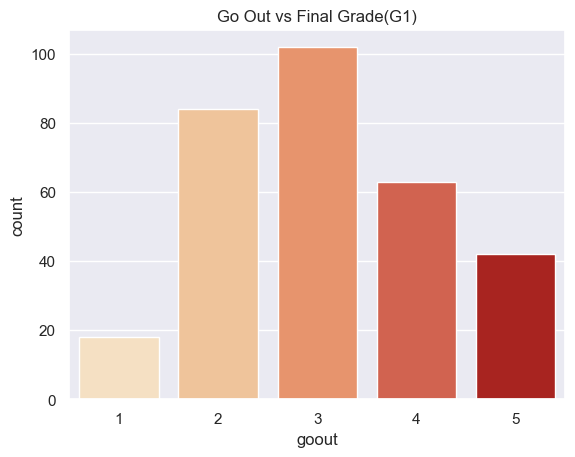

In [ ]:
b = sns.countplot(x=selected_data['goout'],palette='OrRd')
b.axes.set_title('Go Out vs Final Grade(G1)')

The students have an average score when it comes to going out with friends.

C:\Users\cvgam\AppData\Local\Temp\ipykernel_6876\1124176493.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  b = sns.swarmplot(x=selected_data['goout'],y=selected_data['G1'],palette='autumn')


Text(0.5, 1.0, 'Go Out vs Final Grade(G1)')

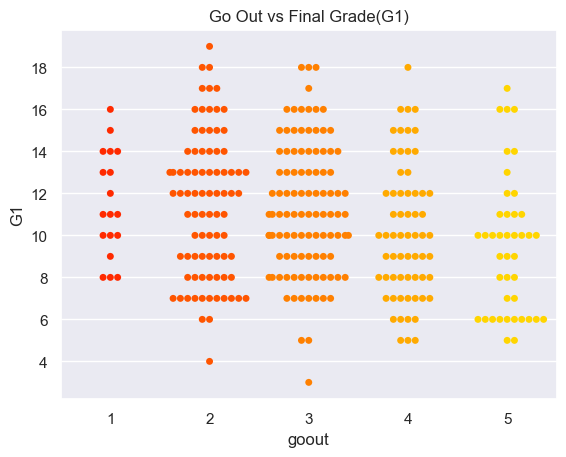

In [ ]:
b = sns.swarmplot(x=selected_data['goout'],y=selected_data['G1'],palette='autumn')
b.axes.set_title('Go Out vs Final Grade(G1)')

Students who go out a lot score less


C:\Users\cvgam\AppData\Local\Temp\ipykernel_6876\3883411568.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  b = sns.swarmplot(x=selected_data['Walc'],y=selected_data['G1'],palette='winter')


Text(0.5, 1.0, 'Weekend Alcohol vs Grade(G1)')

C:\Users\cvgam\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


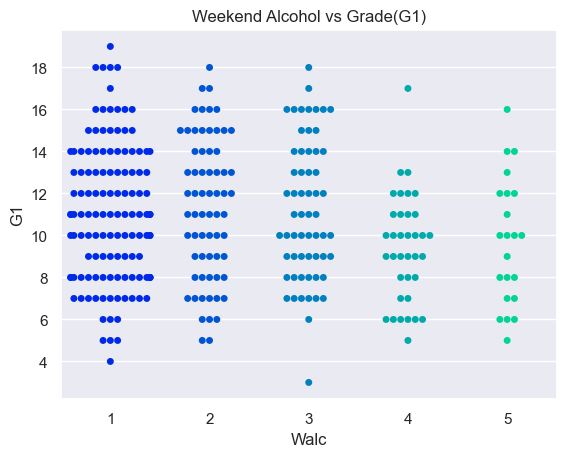

In [ ]:
b = sns.swarmplot(x=selected_data['Walc'],y=selected_data['G1'],palette='winter')
b.axes.set_title('Weekend Alcohol vs Grade(G1)')

Student with more weekend alcohol score less

C:\Users\cvgam\AppData\Local\Temp\ipykernel_6876\4251551192.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  b = sns.swarmplot(x=selected_data['studytime'],y=selected_data['G1'],palette='summer')


Text(0.5, 1.0, 'Study time vs Grade(G1)')

C:\Users\cvgam\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 15.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


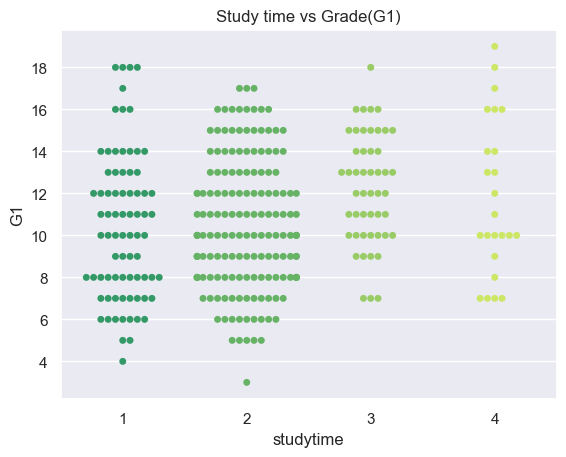

In [ ]:
b = sns.swarmplot(x=selected_data['studytime'],y=selected_data['G1'],palette='summer')
b.axes.set_title('Study time vs Grade(G1)')

Students who study more get higher grade

Text(0.5, 1.0, 'School Support vs Final Grade(G1)')

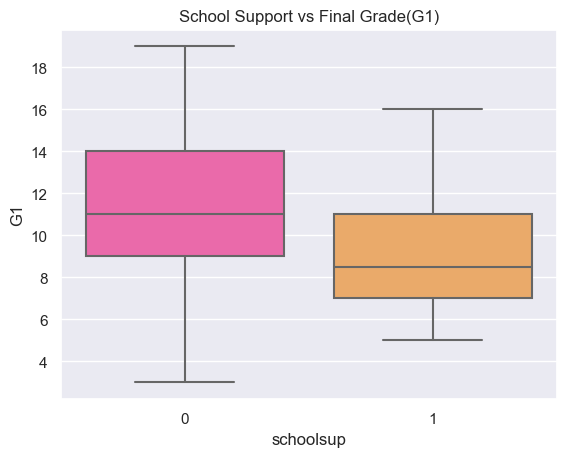

In [ ]:
b = sns.boxplot(x=selected_data['schoolsup'],y=selected_data['G1'],palette='spring')
b.axes.set_title('School Support vs Final Grade(G1)')

Students with no school support score higher

# Task 1: Split the data into training (85%) and validation (15%) parts

In [ ]:
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso,
)
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingClassifier,
)
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score,StratifiedKFold, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import RidgeCV, LassoCV

In [ ]:
X = selected_data.drop('G1',axis = 1)
y = selected_data['G1']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=42)

# Task 2: Based on the data, build a linear regression model (Regularization)

In [ ]:
model1 = LinearRegression()
#Train the model
model1.fit(X_train, y_train)
y_test_pred = model1.predict(X_test)

In [ ]:
#Evaluate the performance function
def evaluate_indicator(y_test,y_test_pred):

    mse = mean_squared_error(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_test, y_test_pred)
    results = pd.DataFrame({'result':{'MSE':mse,
                           'MAE':mae,
                           'RMSE':rmse,
                           'R_square':r_squared}})

    return results

In [ ]:
evaluate_indicator(y_test,y_test_pred)

,result
MAE,2.142578
MSE,6.532003
RMSE,2.555778
R_square,0.143566


The result is not so positive, now applying the regularization

In [ ]:
# Ridge Regression Cross-validation
alphas = np.logspace(-2, 3, 100)  # Range of alpha values to explore
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train, y_train)

# Optimal alpha for Ridge
optimal_alpha_ridge = ridge_cv.alpha_
print("Optimal alpha for Ridge:", optimal_alpha_ridge)

# Lasso Regression Cross-validation
lasso_cv = LassoCV(alphas=alphas)
lasso_cv.fit(X_train, y_train)

# Optimal alpha for Lasso
optimal_alpha_lasso = lasso_cv.alpha_
print("Optimal alpha for Lasso:", optimal_alpha_lasso)


Optimal alpha for Ridge: 2.9836472402833403
Optimal alpha for Lasso: 0.014174741629268055


In [ ]:
def regularization(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=42)
    model2 = Ridge(alpha=optimal_alpha_ridge)
    model3 = Lasso(alpha=optimal_alpha_lasso)

    models = [model2,model3]
    model_name_list =  ['Ridge', 'Lasso']

    results = pd.DataFrame(columns=['MAE', 'RMSE', 'MSE', 'R^2'], index=model_name_list)

    for i, model in enumerate(models):
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_test_pred = model.predict(X_test)

        # Calculate evaluation metrics
        mse = mean_squared_error(y_test, y_test_pred)
        mae = mean_absolute_error(y_test, y_test_pred)
        rmse = np.sqrt(mse)
        r_squared = r2_score(y_test, y_test_pred)

        # Cross-validation
        scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_squared_error', cv=5)
        rmse_cross_val = np.sqrt(-scores.mean())

        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse,mse,r_squared ]

    return results

In [ ]:
regularization(X, y)

,MAE,RMSE,MSE,R^2
Ridge,2.144791,2.55784,6.542546,0.142184
Lasso,2.146095,2.557335,6.539963,0.142523


# Task 3: Build a RandomForest model with different options for parameters

Consider some parameters that are significant to the model result:
- n_estimators - the number of trees in the "forest"
- min_samples_leaf - minimum number of objects in a leaf
- max_depth - maximum tree depth
- max_features
- criterion — criterion for splitting the sample at the vertex

In [ ]:
# Assuming X and y are your feature matrix and target variable
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rfr = RandomForestRegressor(random_state=42, n_jobs=-1, oob_score=True)

# Train
results = cross_val_score(rfr, X, y, cv=kf, scoring='neg_mean_squared_error')
mse_mean = -results.mean()

# Evaluate the mean squared error on the test dataset
print("CV Root Mean Squared Error: {:.2f}".format(mse_mean))


CV Root Mean Squared Error: 9.81


The MSE is relatively high, if don't want to say it's very high

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

# Assuming X and y are your feature matrix and target variable for regression

# Initialize validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create lists to maintain mean squared error on the training and test dataset
train_mse_mean = []
test_mse_mean = []
train_mse_std = []
test_mse_std = []
trees_grid = [50, 75, 100, 200, 500,1000]

# Train on the training dataset
for ntrees in trees_grid:
    rfr = RandomForestRegressor(n_estimators=ntrees, random_state=42, n_jobs=-1, oob_score=True)
    temp_train_mse = []
    temp_test_mse = []
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        rfr.fit(X_train, y_train)
        temp_train_mse.append(np.mean((rfr.predict(X_train) - y_train) ** 2))
        temp_test_mse.append(np.mean((rfr.predict(X_test) - y_test) ** 2))
    train_mse_mean.append(np.mean(temp_train_mse))
    test_mse_mean.append(np.mean(temp_test_mse))
    train_mse_std.append(np.std(temp_train_mse))
    test_mse_std.append(np.std(temp_test_mse))

# Convert lists to arrays for easier manipulation
train_mse_mean, test_mse_mean = np.array(train_mse_mean), np.array(test_mse_mean)
train_mse_std, test_mse_std = np.array(train_mse_std), np.array(test_mse_std)

print("Best mean squared error on CV is {:.2f} with {} trees".format(min(test_mse_mean),
                                                                     trees_grid[np.argmin(test_mse_mean)]))


Best mean squared error on CV is 9.73 with 500 trees


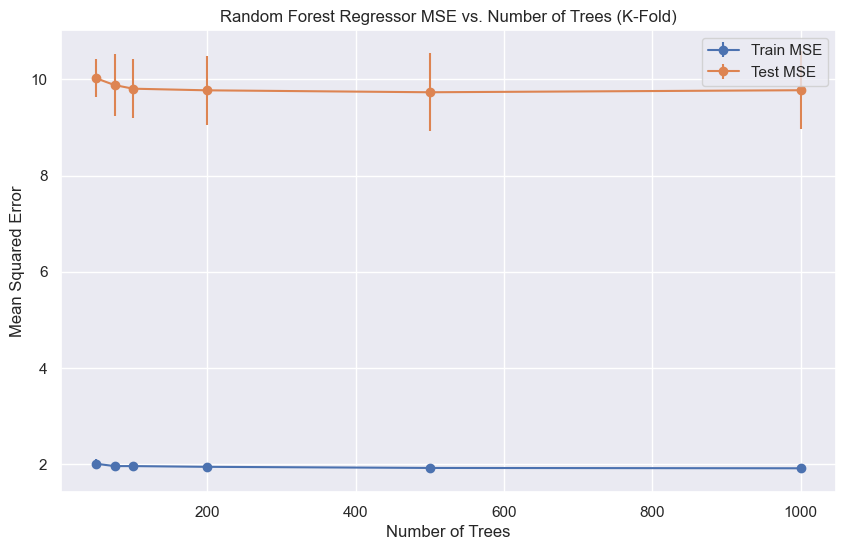

In [ ]:
# Plotting the results with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(trees_grid, train_mse_mean, yerr=train_mse_std, label='Train MSE', marker='o')
plt.errorbar(trees_grid, test_mse_mean, yerr=test_mse_std, label='Test MSE', marker='o')
plt.title('Random Forest Regressor MSE vs. Number of Trees (K-Fold)')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

Low Training MSE but High Validation MSE: This is a classic sign of overfitting

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create lists to maintain mean squared error on the training and test dataset
train_mse_mean = []
test_mse_mean = []
train_mse_std = []
test_mse_std = []
max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24, 30, 40]

# Train on the training dataset
for max_depth in max_depth_grid:
    rfr = RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1, oob_score=True,max_depth = max_depth )
    temp_train_mse = []
    temp_test_mse = []
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        rfr.fit(X_train, y_train)
        temp_train_mse.append(np.mean((rfr.predict(X_train) - y_train) ** 2))
        temp_test_mse.append(np.mean((rfr.predict(X_test) - y_test) ** 2))
    train_mse_mean.append(np.mean(temp_train_mse))
    test_mse_mean.append(np.mean(temp_test_mse))
    train_mse_std.append(np.std(temp_train_mse))
    test_mse_std.append(np.std(temp_test_mse))

# Convert lists to arrays for easier manipulation
train_mse_mean, test_mse_mean = np.array(train_mse_mean), np.array(test_mse_mean)
train_mse_std, test_mse_std = np.array(train_mse_std), np.array(test_mse_std)

print("Best mean squared error on CV is {:.2f} with {} max_depth".format(min(test_mse_mean),
                                                                     max_depth_grid[np.argmin(test_mse_mean)]))

Best mean squared error on CV is 8.77 with 5 max_depth


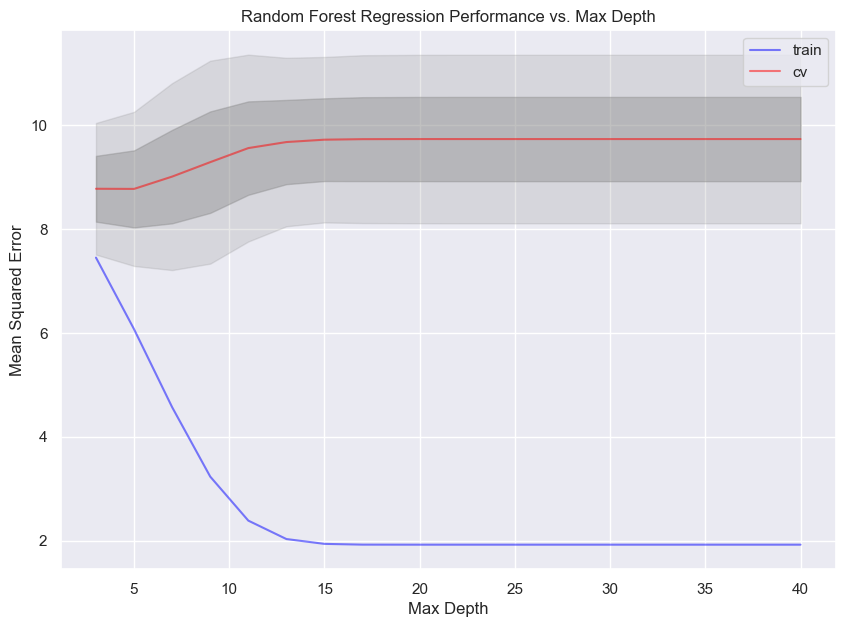

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(max_depth_grid, train_mse_mean, alpha=0.5, color='blue', label='train')
ax.plot(max_depth_grid, test_mse_mean, alpha=0.5, color='red', label='cv')
ax.fill_between(max_depth_grid, test_mse_mean - test_mse_std, test_mse_mean + test_mse_std, color='#888888', alpha=0.4)
ax.fill_between(max_depth_grid, test_mse_mean - 2 * test_mse_std, test_mse_mean + 2 * test_mse_std, color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylabel("Mean Squared Error")
ax.set_xlabel("Max Depth")
ax.set_title("Random Forest Regression Performance vs. Max Depth")
plt.show()

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create lists to maintain mean squared error on the training and test dataset
train_mse_mean = []
test_mse_mean = []
train_mse_std = []
test_mse_std = []
min_samples_leaf_grid = [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

# Train on the training dataset
for min_samples_leaf in min_samples_leaf_grid:
    rfr = RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1, oob_score=True,min_samples_leaf=min_samples_leaf )
    temp_train_mse = []
    temp_test_mse = []
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        rfr.fit(X_train, y_train)
        temp_train_mse.append(np.mean((rfr.predict(X_train) - y_train) ** 2))
        temp_test_mse.append(np.mean((rfr.predict(X_test) - y_test) ** 2))
    train_mse_mean.append(np.mean(temp_train_mse))
    test_mse_mean.append(np.mean(temp_test_mse))
    train_mse_std.append(np.std(temp_train_mse))
    test_mse_std.append(np.std(temp_test_mse))

# Convert lists to arrays for easier manipulation
train_mse_mean, test_mse_mean = np.array(train_mse_mean), np.array(test_mse_mean)
train_mse_std, test_mse_std = np.array(train_mse_std), np.array(test_mse_std)

print("Best mean squared error on CV is {:.2f} with {} min_samples_leaf".format(min(test_mse_mean),
                                                                     min_samples_leaf_grid[np.argmin(test_mse_mean)]))

Best mean squared error on CV is 8.91 with 5 min_samples_leaf


On validation, we cannot see any improvement, so I should dig deeper into the overfitting.

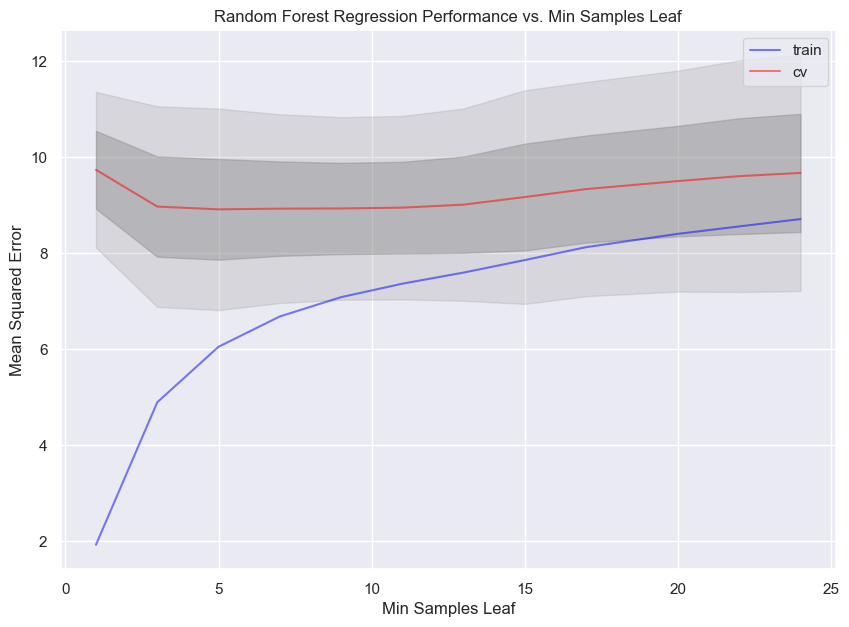

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(min_samples_leaf_grid, train_mse_mean, alpha=0.5, color='blue', label='train')
ax.plot(min_samples_leaf_grid, test_mse_mean, alpha=0.5, color='red', label='cv')
ax.fill_between(min_samples_leaf_grid, test_mse_mean - test_mse_std, test_mse_mean + test_mse_std, color='#888888', alpha=0.4)
ax.fill_between(min_samples_leaf_grid, test_mse_mean - 2 * test_mse_std, test_mse_mean + 2 * test_mse_std, color='#888888', alpha=0.2)

ax.legend(loc='best')
ax.set_ylabel("Mean Squared Error")
ax.set_xlabel("Min Samples Leaf")
ax.set_title("Random Forest Regression Performance vs. Min Samples Leaf")

plt.show()


There are improvements!!! Now considering the max_features

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create lists to maintain mean squared error on the training and test dataset
train_mse_mean = []
test_mse_mean = []
train_mse_std = []
test_mse_std = []
max_features_grid = [2, 4, 6, 8, 10, 12, 14, 16]

# Train on the training dataset
for max_features in max_features_grid:
    rfr = RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1, oob_score=True,max_features=max_features )
    temp_train_mse = []
    temp_test_mse = []
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        rfr.fit(X_train, y_train)
        temp_train_mse.append(np.mean((rfr.predict(X_train) - y_train) ** 2))
        temp_test_mse.append(np.mean((rfr.predict(X_test) - y_test) ** 2))
    train_mse_mean.append(np.mean(temp_train_mse))
    test_mse_mean.append(np.mean(temp_test_mse))
    train_mse_std.append(np.std(temp_train_mse))
    test_mse_std.append(np.std(temp_test_mse))

# Convert lists to arrays for easier manipulation
train_mse_mean, test_mse_mean = np.array(train_mse_mean), np.array(test_mse_mean)
train_mse_std, test_mse_std = np.array(train_mse_std), np.array(test_mse_std)

print("Best mean squared error on CV is {:.2f} with {} max_features".format(min(test_mse_mean),
                                                                     max_features_grid[np.argmin(test_mse_mean)]))

Best mean squared error on CV is 9.53 with 2 max_features


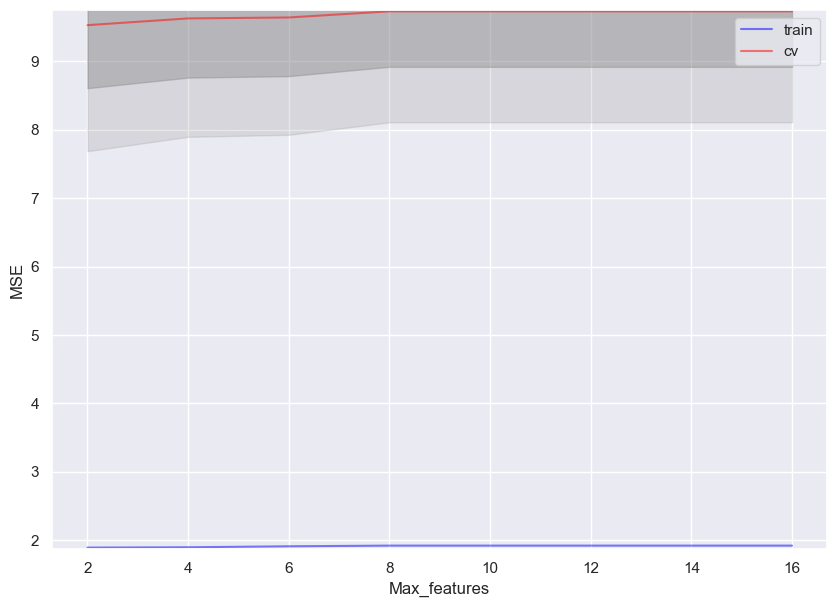

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(max_features_grid, train_mse_mean, alpha=0.5, color='blue', label='train')
ax.plot(max_features_grid, test_mse_mean, alpha=0.5, color='red', label='cv')
ax.fill_between(max_features_grid, test_mse_mean - test_mse_std, test_mse_mean + test_mse_std, color='#888888', alpha=0.4)
ax.fill_between(max_features_grid, test_mse_mean - 2 * test_mse_std, test_mse_mean + 2 * test_mse_std, color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([min(min(train_mse_mean), min(test_mse_mean)) - 0.02, max(max(train_mse_mean), max(test_mse_mean)) + 0.02])
ax.set_ylabel("MSE")
ax.set_xlabel("Max_features")

# Display the plot
plt.show()

# Task 4: Select the best set of parameters based on cross-validation

In [ ]:
parameters = {'max_features': [1, 5, 7, 9], 'min_samples_leaf': [1, 3, 5, 7], 'max_depth': [5,10,15,20]}
rfr = RandomForestRegressor(n_estimators=500, random_state=42,
                             n_jobs=-1, oob_score=True)
gcv = GridSearchCV(rfr, parameters, n_jobs=-1, cv=kf, verbose=1)
gcv.fit(X, y)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(n_estimators=500, n_jobs=-1,
                                             oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [1, 5, 7, 9],
                         'min_samples_leaf': [1, 3, 5, 7]},
             verbose=1)

In [ ]:
gcv.best_estimator_, gcv.best_score_

(RandomForestRegressor(max_depth=5, max_features=1, n_estimators=500, n_jobs=-1,
                       oob_score=True, random_state=42),
 0.17129716336422135)

# Task 5: Select the best model based on the results on your validation set

In [ ]:
def train_regression_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=42)

    model1 = LinearRegression()
    model2 = Ridge(alpha =2.9836472402833403)
    model3 = Lasso(alpha =0.014174741629268055)
    model4 = RandomForestRegressor(max_depth=5, max_features=1, n_estimators=500, n_jobs=-1,
                       oob_score=True, random_state=42)

    models = [model1, model2, model3, model4]
    model_name_list = ['LinearRegression', 'Ridge','Lasso','RandomForestRegressor']

    # Dataframe for results
    results = pd.DataFrame(columns=['MAE', 'RMSE', 'MSE', 'R^2'], index=model_name_list)

    for i, model in enumerate(models):
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_test_pred = model.predict(X_test)

        # Calculate evaluation metrics
        mse = mean_squared_error(y_test, y_test_pred)
        mae = mean_absolute_error(y_test, y_test_pred)
        rmse = np.sqrt(mse)
        r_squared = r2_score(y_test, y_test_pred)

        # Cross-validation
        scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_squared_error', cv=5)
        rmse_cross_val = np.sqrt(-scores.mean())

        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse,mse,r_squared ]

    return results

In [ ]:
train_regression_model(X, y)

,MAE,RMSE,MSE,R^2
LinearRegression,2.142578,2.555778,6.532003,0.143566
Ridge,2.144791,2.55784,6.542546,0.142184
Lasso,2.146095,2.557335,6.539963,0.142523
RandomForestRegressor,2.121026,2.505903,6.27955,0.176666


#### Base on the validation, the RandomForestRegressor is the best model!!!

In [ ]:
model4 = RandomForestRegressor(max_depth=5, max_features=1, n_estimators=500, n_jobs=-1,
                       oob_score=True, random_state=42)
model4.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features=1, n_estimators=500, n_jobs=-1,
                      oob_score=True, random_state=42)

# Task 6: Using the selected model, build a forecast for the data

In [ ]:
forecast_data = pd.read_csv('test.csv', delimiter=';',index_col = 'id')
forecast_data.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
id,,,,,,,,,,,,,,,,,,,,,
310,F,16,U,LE3,T,2,2,other,other,home,...,yes,yes,yes,3,3,3,1,2,3,25
311,F,16,U,GT3,T,4,2,services,other,course,...,yes,yes,no,4,2,3,1,1,5,2
312,M,16,U,GT3,T,4,4,health,other,reputation,...,yes,yes,no,4,2,4,2,4,1,2
313,M,15,U,GT3,T,4,4,services,services,reputation,...,yes,yes,no,4,3,1,1,1,5,0
314,F,18,U,GT3,T,2,1,other,other,course,...,yes,yes,yes,4,4,4,1,1,3,0


In [ ]:
selected_columns = ['failures', 'higher', 'schoolsup', 'goout', 'studytime', 'Medu', 'Fedu', 'Walc']
forecast_data_filtered = forecast_data[selected_columns]
for column in ['schoolsup','higher']:
       forecast_data_filtered[column]= forecast_data_filtered[column].replace({'no': 0, 'yes': 1})
forecast_data_filtered.head()

C:\Users\cvgam\AppData\Local\Temp\ipykernel_6876\1253944447.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_data_filtered[column]= forecast_data_filtered[column].replace({'no': 0, 'yes': 1})


,failures,higher,schoolsup,goout,studytime,Medu,Fedu,Walc
id,,,,,,,,
310,1,1,0,3,2,2,2,2
311,0,1,0,3,2,4,2,1
312,0,1,0,4,2,4,4,4
313,0,1,0,1,2,4,4,1
314,0,1,0,4,3,2,1,1


In [ ]:
test_data = forecast_data_filtered
rfr_trained = RandomForestRegressor(max_depth=5, max_features=1, n_estimators=500, n_jobs=-1,
                       oob_score=True, random_state=42)
rfr_trained.fit(X_train, y_train)
G1_pred = model4.predict(test_data)
G1_pred_series = pd.Series(G1_pred,name='G1_pred')
G1_pred_series.to_excel(r'C:\Users\cvgam\Desktop\Study Materials\Data Visualization\G1_pred2.xlsx', index=False)

### Since I don't want to mess up with the pandas to merge the test.csv and my G1_pred I have exported it and matched it using excel